<a href="https://colab.research.google.com/github/Ahpatsum15/github-slideshow/blob/Ahpatsum15-patch-1/Non_paremetric_estimation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importer les bibilotheques nécessaires 
import matplotlib.pyplot as plt 
import scipy as sp 
import numpy as np 
import networkx as nx 

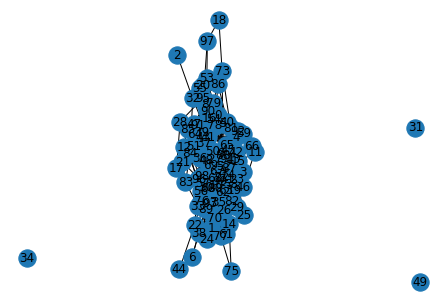

In [5]:
#ER graph 
G= nx.erdos_renyi_graph(100,0.05)
nx.draw(G, with_labels=True)     
plt.draw()

In [6]:

#number of realizations 
R= np.arange(1,20)
#ER graph 
G=nx.erdos_renyi_graph(100,0.05)
S=nx.adjacency_matrix(G) #we define the shift 

In [7]:
np.shape(S) #we verify that S is a matrix

(100, 100)

In [8]:
#let's define the filter H
h=np.random.random_sample((4,)) #on define les coefficients du filtre
H = np.zeros(100)
S_0 = np.identity(100)
S_2= S@S
S_3=S_2@S
H= h[0]*S_0+ h[1]*S+h[2]*S_2+h[3]*S_3 #filter of degree 3 formula

In [9]:
H #let's verify it does work 

matrix([[3.59500022, 7.38281404, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [7.38281404, 9.30954487, 0.        , ..., 1.17303595, 2.93258989,
         0.58651798],
        [0.        , 0.        , 2.13137569, ..., 0.58651798, 0.58651798,
         0.        ],
        ...,
        [0.        , 1.17303595, 0.58651798, ..., 5.790437  , 9.72888594,
         0.73181226],
        [0.        , 2.93258989, 0.58651798, ..., 9.72888594, 7.69528522,
         0.58651798],
        [0.        , 0.58651798, 0.        , ..., 0.73181226, 0.58651798,
         1.39956343]])

In [10]:
H_her= H.getH() #H_her is the hermitian of the matrix H
C_x= H@H_her #define the covariance matrix 

In [11]:
C_x

matrix([[ 315.85856597,  372.52350697,   35.4198138 , ...,  184.44834053,
          403.82260457,   28.88224655],
        [ 372.52350697, 1133.21979059,   84.40589437, ...,  393.53032667,
          659.97390774,   42.69463965],
        [  35.4198138 ,   84.40589437,   98.12589551, ...,  109.82692749,
          221.73128623,    8.08251219],
        ...,
        [ 184.44834053,  393.53032667,  109.82692749, ...,  854.87282282,
          803.41084159,  119.39208676],
        [ 403.82260457,  659.97390774,  221.73128623, ...,  803.41084159,
         1978.97880151,   90.83643678],
        [  28.88224655,   42.69463965,    8.08251219, ...,  119.39208676,
           90.83643678,   31.41332008]])

In [12]:
p,V=np.linalg.eig(C_x) #decomposition of the covariance matrix 
V_her=V.getH() #the hermitian of Fourier graph transform

In [13]:
V_her #verify it's a matrix 

matrix([[ 0.04947364,  0.0997029 ,  0.02415407, ...,  0.09165   ,
          0.1679852 ,  0.00903053],
        [-0.0296184 , -0.19109296,  0.00735383, ..., -0.03861893,
          0.12413892, -0.0187835 ],
        [ 0.01260631,  0.08467174,  0.00629885, ..., -0.11135478,
         -0.03354897, -0.02510598],
        ...,
        [-0.08087627, -0.08815423, -0.0425343 , ..., -0.053579  ,
         -0.09974908,  0.20511777],
        [-0.02313439, -0.06181749,  0.09175173, ...,  0.04158388,
          0.07093977,  0.3583421 ],
        [-0.04248879, -0.07954336, -0.17690514, ..., -0.0259839 ,
         -0.12830635, -0.16866807]])

In [14]:
V@V.getH() #verification that V is unitary ; as we can see it's equal to the identity matrix

matrix([[ 1.00000000e+00,  1.11998084e-13,  2.81774604e-13, ...,
          1.96378721e-13, -3.61147744e-13,  9.44490146e-13],
        [ 1.11998084e-13,  1.00000000e+00,  8.39103093e-14, ...,
         -2.41934511e-13,  5.64503305e-13,  1.06441939e-12],
        [ 2.81774604e-13,  8.39103093e-14,  1.00000000e+00, ...,
          2.56767697e-13,  1.90330390e-13,  1.75534240e-12],
        ...,
        [ 1.96378721e-13, -2.41934511e-13,  2.56767697e-13, ...,
          1.00000000e+00, -9.80344278e-14,  4.91402058e-13],
        [-3.61147744e-13,  5.64503305e-13,  1.90330390e-13, ...,
         -9.80344278e-14,  1.00000000e+00,  4.00606631e-13],
        [ 9.44490146e-13,  1.06441939e-12,  1.75534240e-12, ...,
          4.91402058e-13,  4.00606631e-13,  1.00000000e+00]])

In [15]:
V_her=np.array(V_her) # to not confuse matrix and array afterward, it's safe to make it as an array
V_her

array([[ 0.04947364,  0.0997029 ,  0.02415407, ...,  0.09165   ,
         0.1679852 ,  0.00903053],
       [-0.0296184 , -0.19109296,  0.00735383, ..., -0.03861893,
         0.12413892, -0.0187835 ],
       [ 0.01260631,  0.08467174,  0.00629885, ..., -0.11135478,
        -0.03354897, -0.02510598],
       ...,
       [-0.08087627, -0.08815423, -0.0425343 , ..., -0.053579  ,
        -0.09974908,  0.20511777],
       [-0.02313439, -0.06181749,  0.09175173, ...,  0.04158388,
         0.07093977,  0.3583421 ],
       [-0.04248879, -0.07954336, -0.17690514, ..., -0.0259839 ,
        -0.12830635, -0.16866807]])

In [16]:
#this function make the square of every element 
def module_vec(x): 
  n=np.size(x)
  y=np.zeros((n,1))
  for i in range(n) :
    y[i][0]=x[i]**2
  return y


In [17]:
MSE= []
for i in R: 
  p_pg =np.zeros((100,1))
  for j in range(1,i+1): 
    w=np.random.normal(0,1,100)
    w=np.transpose(w)
    y=H@w #the response of the filter 
    y=np.transpose(y)
    p_pg= p_pg + module_vec(np.dot(V_her,y)) 
  b_pg = p_pg/i - p  #the bias formula 
  MSE.append(sp.linalg.norm(b_pg) + 2*sp.linalg.norm(p)**2/i)
MSE = np.array(MSE)  

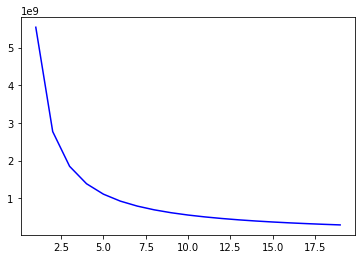

In [18]:
#code pour plot 
plt.plot(R,MSE, color='b')
#On compare la valeur du MSE théorique avec celle qui a été calculé par des moyens epiriques. 
#plt.plot(R,sp.linalg.norm(p)**2/R, color = 'r',xlabel="drf") #we tried to compare it to the final formula but it doesn't work 
plt.show()

In [19]:
#we obtain a curve similar to the one given by the article 
MSE 

array([5.53959363e+09, 2.77009458e+09, 1.84715915e+09, 1.38549489e+09,
       1.10844012e+09, 9.23791702e+08, 7.91993432e+08, 6.92984606e+08,
       6.16077571e+08, 5.54485831e+08, 5.04547860e+08, 4.62621036e+08,
       4.26781361e+08, 3.96293636e+08, 3.69969323e+08, 3.46868797e+08,
       3.26662954e+08, 3.08466747e+08, 2.92148516e+08])